Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [2]:
import pandas as pd
import numpy as np
import time

start_time_pandas = time.time()
pandas_data = pd.DataFrame(np.random.randint(1, 101, size=(1000000, 1)), columns=['Random Numbers'])
pandas_time = time.time() - start_time_pandas


start_time_numpy = time.time()
numpy_data = np.random.randint(1, 101, size=1000000)
numpy_time = time.time() - start_time_numpy


print(f"Pandas requires time to generate data: {pandas_time:.5f} 秒")
print(f"The time required for NumPy to generate data: {numpy_time:.5f} 秒")


if pandas_time < numpy_time:
    print("Pandas is faster")
else:
    print("NumPy is faster")


Pandas requires time to generate data: 0.01617 秒
The time required for NumPy to generate data: 0.01523 秒
NumPy is faster


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [10]:
import pandas as pd
import numpy as np
import time


df = pd.read_csv('sleep_health.csv')


print("Pandas 列名:\n", df.columns.tolist())


data = np.genfromtxt('sleep_health.csv', delimiter=',', dtype=None, encoding='utf-8', names=True)


print("NumPy 列名:\n", data.dtype.names)


mean_values_pandas = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
print("Pandas mean:\n", mean_values_pandas)

mean_values_numpy = {
    'Sleep Duration': np.mean(data['Sleep_Duration']),
    'Systolic blood pressure': np.mean(data['Systolic_blood_pressure']),
    'Diastolic blood pressure': np.mean(data['Diastolic_blood_pressure']),
    'Heart Rate': np.mean(data['Heart_Rate']),
    'Daily Steps': np.mean(data['Daily_Steps'])
}
print("NumPy mean:\n", mean_values_numpy)


numeric_cols = df.select_dtypes(include=[np.number]) 
correlation_pandas = numeric_cols.corr()

sleep_duration_age_corr = df['Sleep Duration'].corr(df['Age'])
sleep_duration_heart_rate_corr = df['Sleep Duration'].corr(df['Heart Rate'])
sleep_duration_daily_steps_corr = df['Sleep Duration'].corr(df['Daily Steps'])

print("Pandas correlation matrix:\n", correlation_pandas)
print("Pandas correlation (sleep duration and age):", sleep_duration_age_corr)
print("Pandas correlation (sleep duration and heart rate):", sleep_duration_heart_rate_corr)
print("Pandas correlation (sleep duration and daily steps):", sleep_duration_daily_steps_corr)


correlation_numpy_age = np.corrcoef(data['Sleep_Duration'], data['Age'])[0, 1]
correlation_numpy_heart_rate = np.corrcoef(data['Sleep_Duration'], data['Heart_Rate'])[0, 1]
correlation_numpy_daily_steps = np.corrcoef(data['Sleep_Duration'], data['Daily_Steps'])[0, 1]

print("NumPy correlation (sleep duration and age):", correlation_numpy_age)
print("NumPy correlation (sleep duration and heart rate):", correlation_numpy_heart_rate)
print("NumPy correlation (sleep duration and daily steps):", correlation_numpy_daily_steps)


std_dev_pandas = df['Sleep Duration'].std()
print("Pandas standard deviation (sleep duration):", std_dev_pandas)


std_dev_numpy = np.std(data['Sleep_Duration'], ddof=1)  
print("NumPy standard deviation (sleep duration):", std_dev_numpy)


start_time_pandas = time.time()
mean_values_pandas = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
std_dev_pandas = df['Sleep Duration'].std()
end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas


start_time_numpy = time.time()
mean_values_numpy = {
    'Sleep Duration': np.mean(data['Sleep_Duration']),
    'Systolic blood pressure': np.mean(data['Systolic_blood_pressure']),
    'Diastolic blood pressure': np.mean(data['Diastolic_blood_pressure']),
    'Heart Rate': np.mean(data['Heart_Rate']),
    'Daily Steps': np.mean(data['Daily_Steps'])
}
std_dev_numpy = np.std(data['Sleep_Duration'], ddof=1)
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

print(f"Time to use Pandas: {pandas_time:.6f} seconds")
print(f"Time spent using NumPy: {numpy_time:.6f} seconds")


if pandas_time < numpy_time:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Pandas 列名:
 ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
NumPy 列名:
 ('Person_ID', 'Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level', 'BMI_Category', 'Systolic_blood_pressure', 'Diastolic_blood_pressure', 'Heart_Rate', 'Daily_Steps', 'Sleep_Disorder')
Pandas mean:
 Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
NumPy mean:
 {'Sleep Duration': np.float64(7.132085561497325), 'Systolic blood pressure': np.float64(128.55347593582889), 'Diastolic blood pressure': np.float64(84.64973262032086), 'Heart Rate': np.float64(70.16577540106952), 'Daily Steps': np.float64(6816.844

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy


### Plotting Age ###


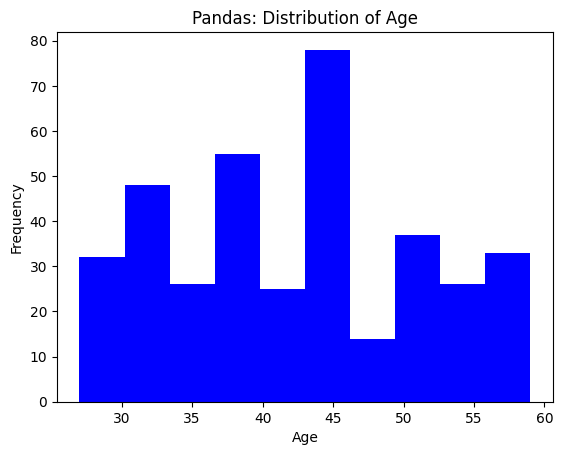

Pandas time: 0.1230 seconds


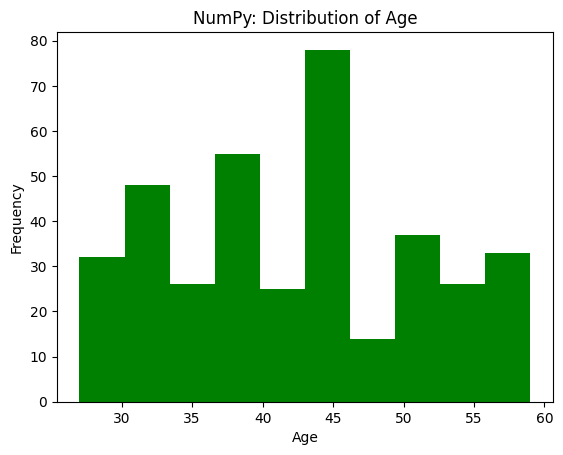

NumPy time: 0.1035 seconds

### Plotting Sleep Duration ###


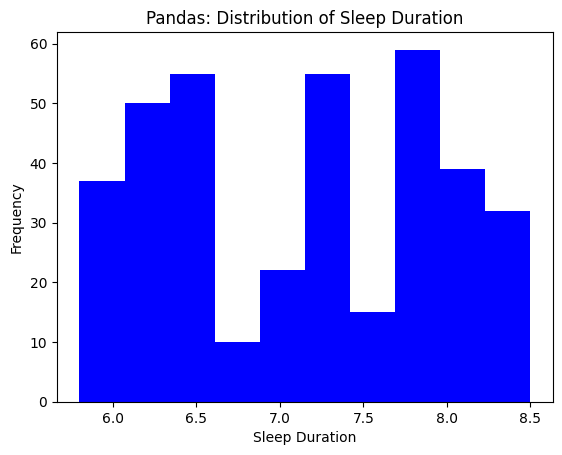

Pandas time: 0.1050 seconds


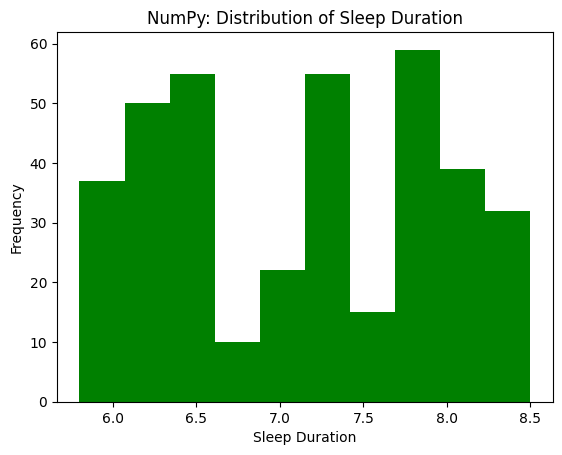

NumPy time: 0.1126 seconds

### Plotting Quality of Sleep ###


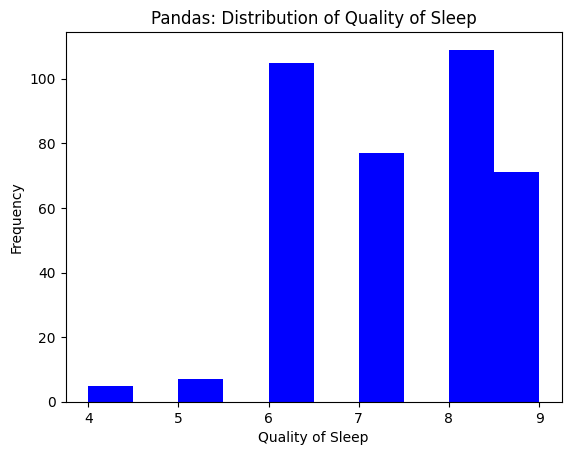

Pandas time: 0.0997 seconds


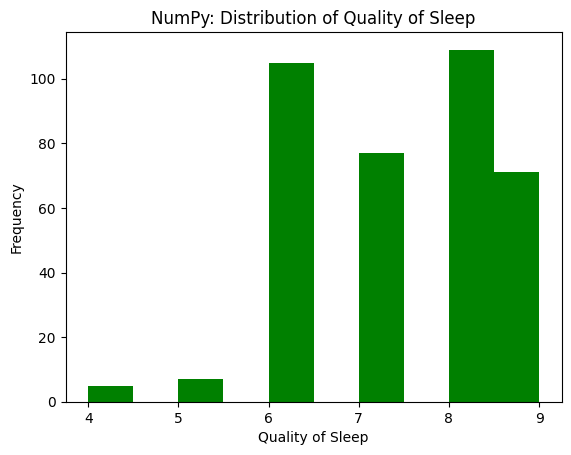

NumPy time: 0.1094 seconds

### Plotting Physical Activity Level ###


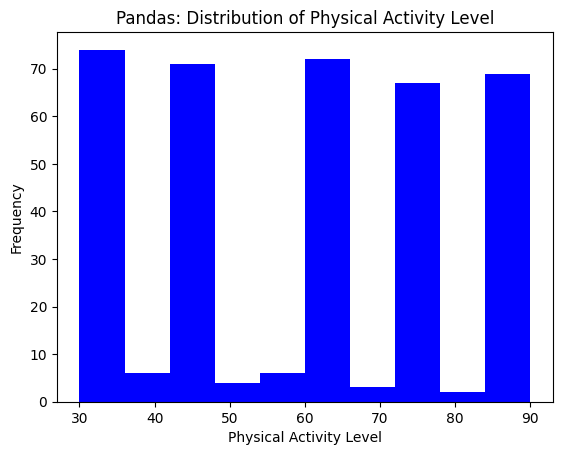

Pandas time: 0.0996 seconds


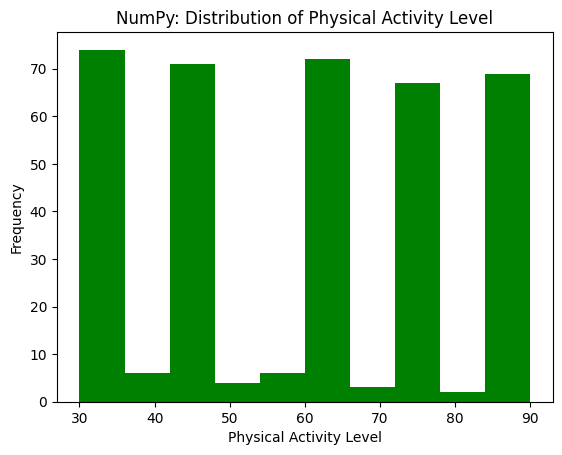

NumPy time: 0.1675 seconds

### Plotting Stress Level ###


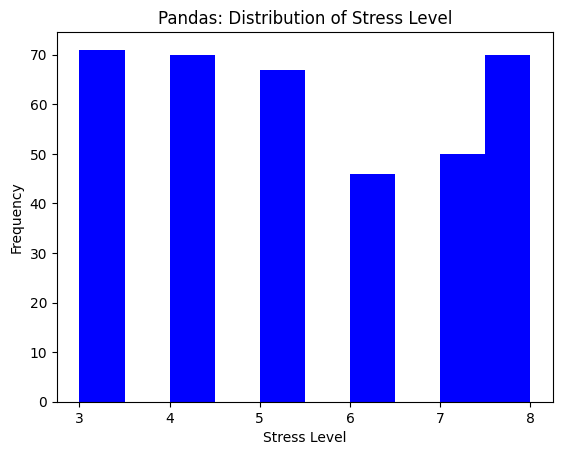

Pandas time: 0.1121 seconds


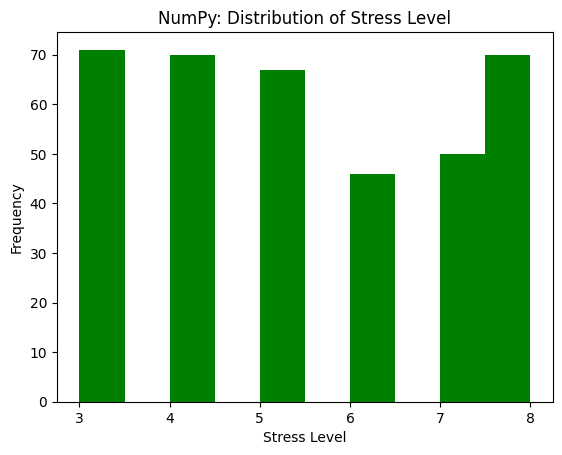

NumPy time: 0.1313 seconds

### Plotting Heart Rate ###


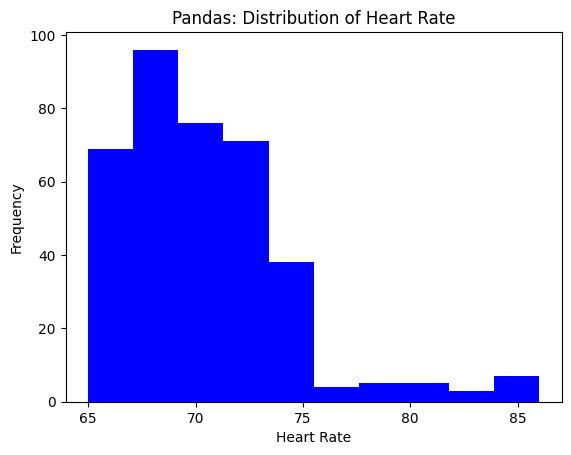

Pandas time: 0.1054 seconds


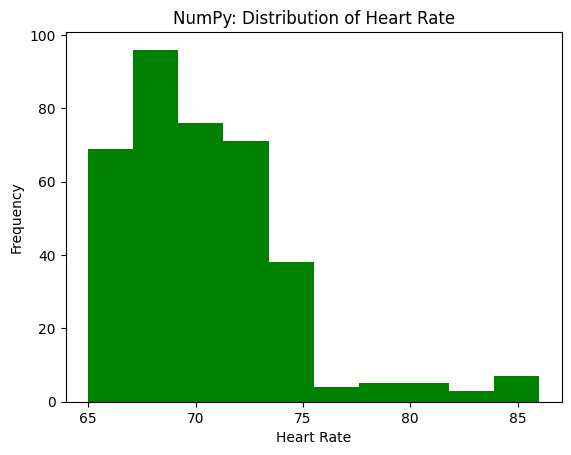

NumPy time: 0.1014 seconds

### Boxplot for Quality of Sleep ###


<Figure size 640x480 with 0 Axes>

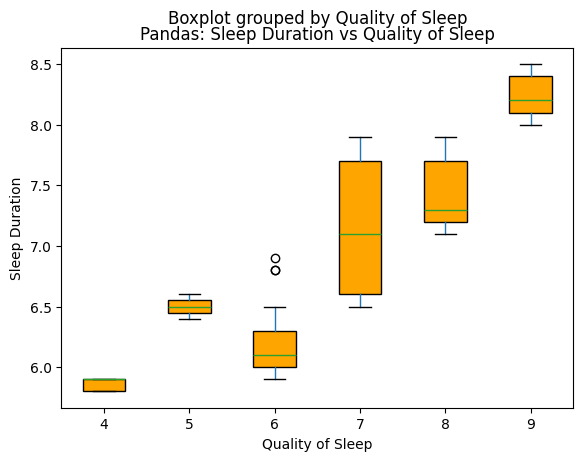

Pandas time: 0.1511 seconds


C:\Users\39549\AppData\Local\Temp\ipykernel_15168\4163681480.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_data, labels=unique_vals, patch_artist=True, boxprops=dict(facecolor=color))


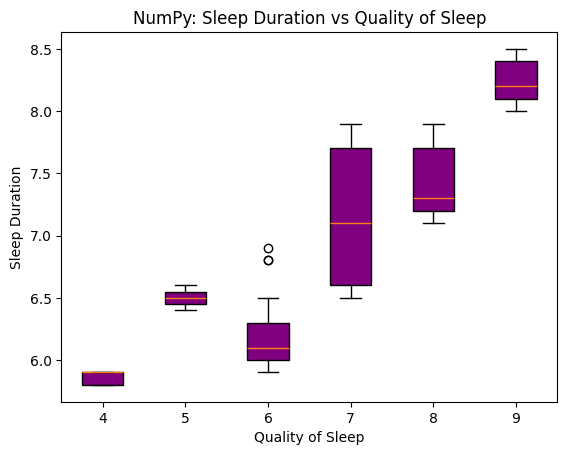

NumPy time: 0.1272 seconds

### Boxplot for Stress Level ###


<Figure size 640x480 with 0 Axes>

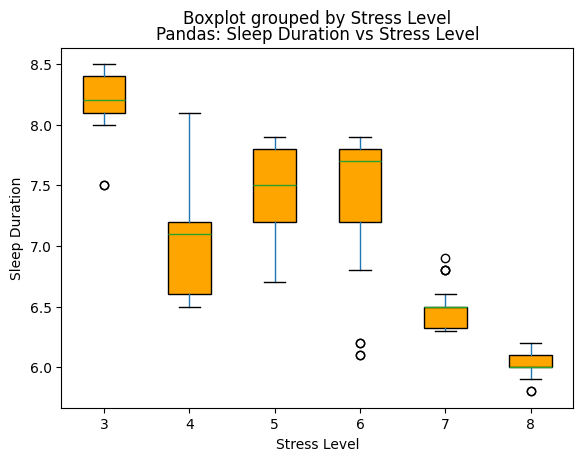

Pandas time: 0.1234 seconds


C:\Users\39549\AppData\Local\Temp\ipykernel_15168\4163681480.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_data, labels=unique_vals, patch_artist=True, boxprops=dict(facecolor=color))


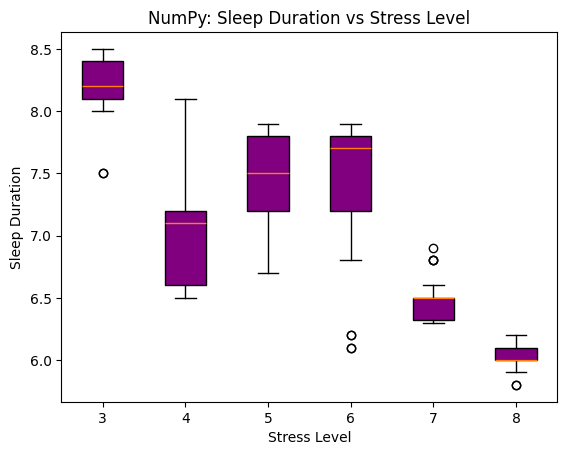

NumPy time: 0.1052 seconds

### Boxplot for Physical Activity Level ###


<Figure size 640x480 with 0 Axes>

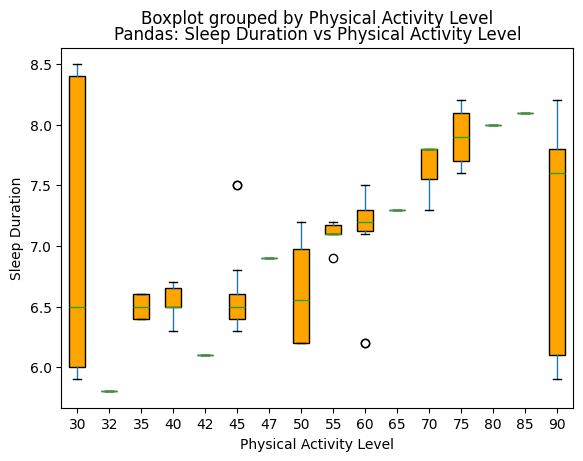

Pandas time: 0.2377 seconds


C:\Users\39549\AppData\Local\Temp\ipykernel_15168\4163681480.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_data, labels=unique_vals, patch_artist=True, boxprops=dict(facecolor=color))


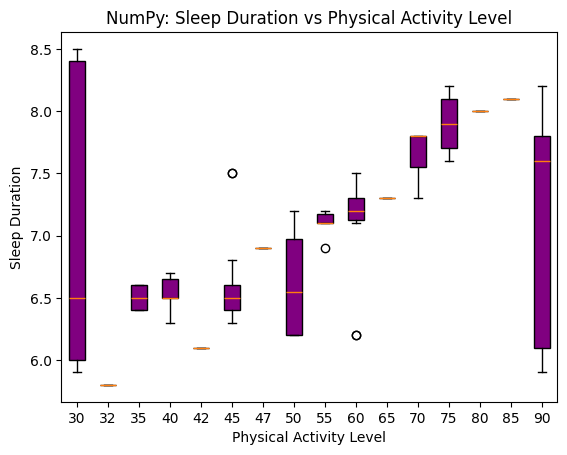

NumPy time: 0.3098 seconds

### Boxplot for Occupation ###


<Figure size 640x480 with 0 Axes>

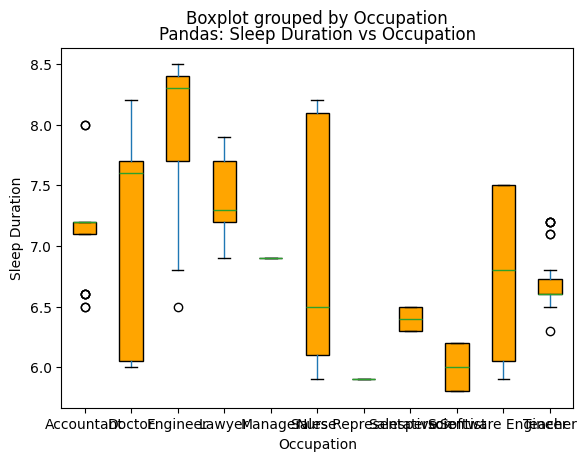

Pandas time: 0.1740 seconds


C:\Users\39549\AppData\Local\Temp\ipykernel_15168\4163681480.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_data, labels=unique_vals, patch_artist=True, boxprops=dict(facecolor=color))


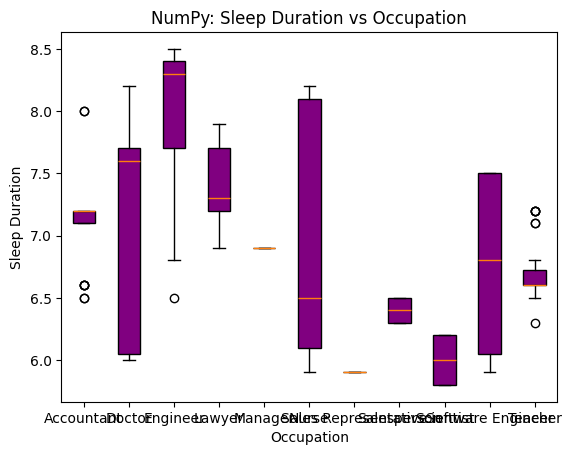

NumPy time: 0.1297 seconds

### Boxplot for BMI Category ###


<Figure size 640x480 with 0 Axes>

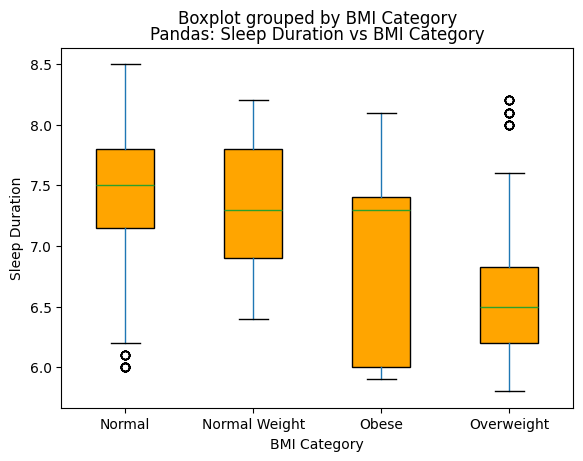

Pandas time: 0.1406 seconds


C:\Users\39549\AppData\Local\Temp\ipykernel_15168\4163681480.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_data, labels=unique_vals, patch_artist=True, boxprops=dict(facecolor=color))


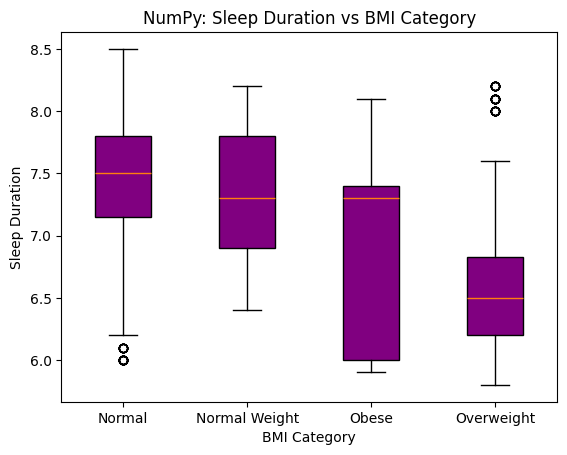

NumPy time: 0.1278 seconds

### Scatter plot for Age vs Sleep Duration ###


<Figure size 640x480 with 0 Axes>

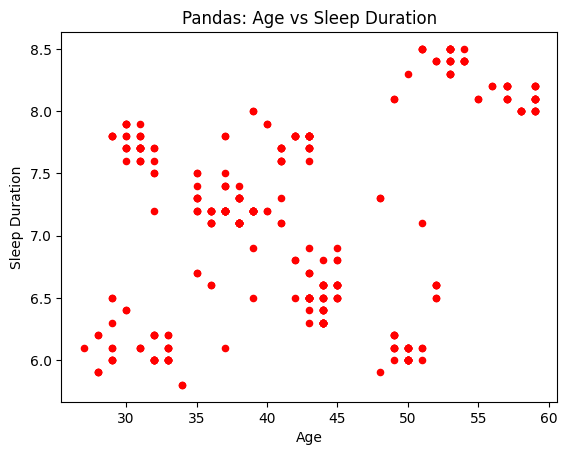

Pandas time: 0.1245 seconds


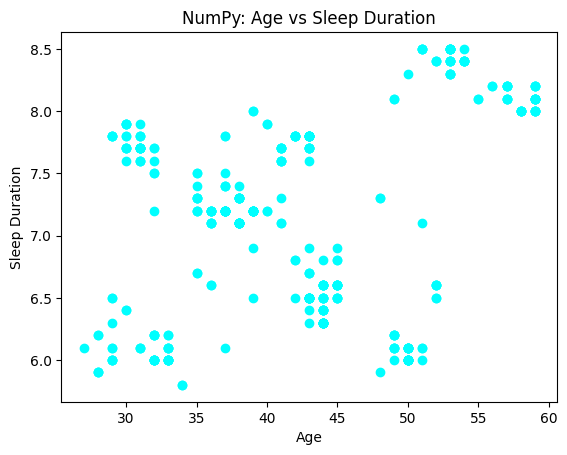

NumPy time: 0.0943 seconds

### Scatter plot for Sleep Duration vs Heart Rate ###


<Figure size 640x480 with 0 Axes>

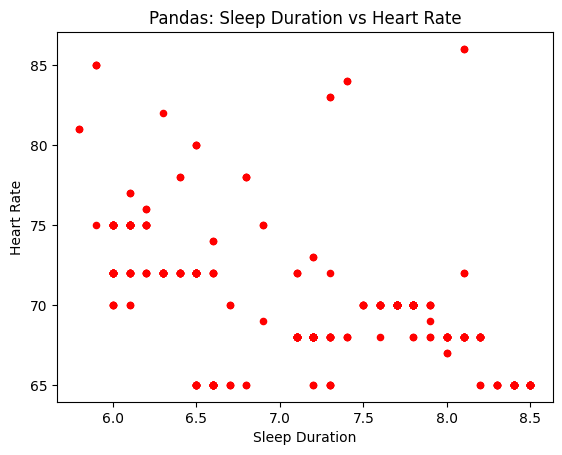

Pandas time: 0.1061 seconds


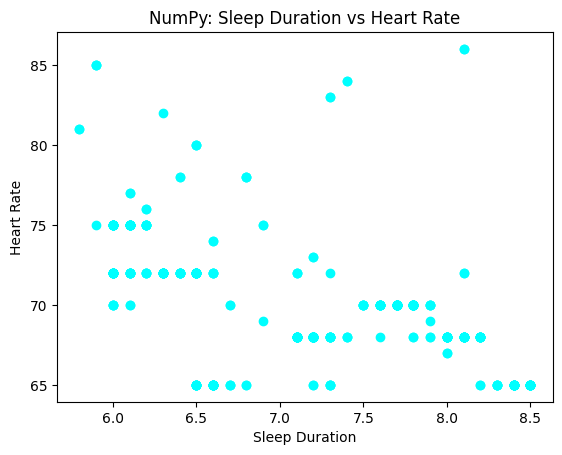

NumPy time: 0.1147 seconds

### Scatter plot for Heart Rate vs Daily Steps ###


<Figure size 640x480 with 0 Axes>

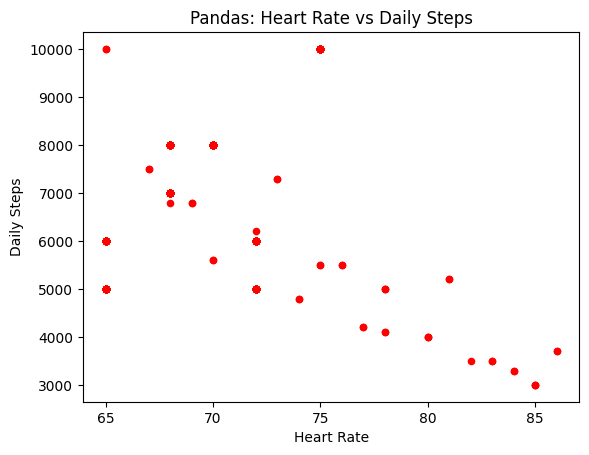

Pandas time: 0.1231 seconds


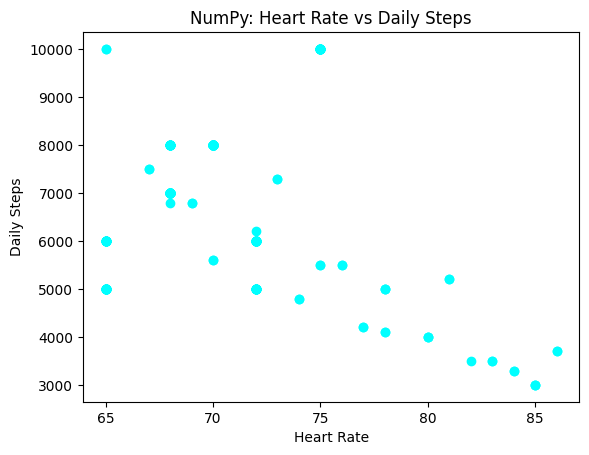

NumPy time: 0.1080 seconds

### Scatter plot for Sleep Duration vs Daily Steps ###


<Figure size 640x480 with 0 Axes>

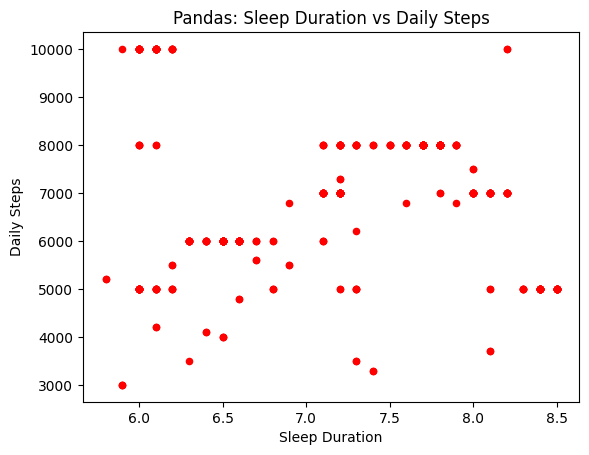

Pandas time: 0.1157 seconds


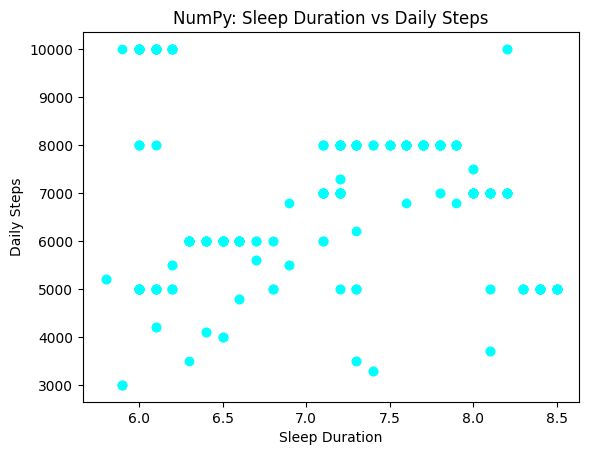

NumPy time: 0.1152 seconds


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv('sleep_health.csv')

# Define variables
variables = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
categorical_vars = ['Quality of Sleep', 'Stress Level', 'Physical Activity Level', 'Occupation', 'BMI Category']
sleep_duration = data['Sleep Duration']

# Plotting helper functions
def plot_pandas(variable, color):
    data[variable].plot(kind='hist', color=color)
    plt.title(f'Pandas: Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

def plot_numpy(variable, color):
    values = data[variable].dropna().values
    plt.hist(values, color=color)
    plt.title(f'NumPy: Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

# Start plotting
for var in variables:
    print(f'\n### Plotting {var} ###')
    
    # Pandas plot
    start_time = time.time()
    plt.figure()
    plot_pandas(var, 'blue')
    pandas_time = time.time() - start_time
    print(f"Pandas time: {pandas_time:.4f} seconds")
    
    # NumPy plot
    start_time = time.time()
    plt.figure()
    plot_numpy(var, 'green')
    numpy_time = time.time() - start_time
    print(f"NumPy time: {numpy_time:.4f} seconds")

# Boxplots for categorical variables
def plot_pandas_boxplot(var, color):
    data.boxplot(column='Sleep Duration', by=var, grid=False, patch_artist=True, boxprops=dict(facecolor=color))
    plt.title(f'Pandas: Sleep Duration vs {var}')
    plt.xlabel(var)
    plt.ylabel('Sleep Duration')
    plt.show()

def plot_numpy_boxplot(var, color):
    unique_vals = np.unique(data[var].dropna().values)
    grouped_data = [sleep_duration[data[var] == val].dropna().values for val in unique_vals]
    plt.boxplot(grouped_data, labels=unique_vals, patch_artist=True, boxprops=dict(facecolor=color))
    plt.title(f'NumPy: Sleep Duration vs {var}')
    plt.xlabel(var)
    plt.ylabel('Sleep Duration')
    plt.show()

for var in categorical_vars:
    print(f'\n### Boxplot for {var} ###')
    
    # Pandas boxplot
    start_time = time.time()
    plt.figure()
    plot_pandas_boxplot(var, 'orange')
    pandas_time = time.time() - start_time
    print(f"Pandas time: {pandas_time:.4f} seconds")
    
    # NumPy boxplot
    start_time = time.time()
    plt.figure()
    plot_numpy_boxplot(var, 'purple')
    numpy_time = time.time() - start_time
    print(f"NumPy time: {numpy_time:.4f} seconds")

# Scatter plots for correlations
def plot_pandas_scatter(var1, var2, color):
    data.plot(kind='scatter', x=var1, y=var2, color=color)
    plt.title(f'Pandas: {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

def plot_numpy_scatter(var1, var2, color):
    x = data[var1].dropna().values
    y = data[var2].dropna().values
    plt.scatter(x, y, color=color)
    plt.title(f'NumPy: {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

# Correlation scatter plots
correlations = [('Age', 'Sleep Duration'), ('Sleep Duration', 'Heart Rate'), ('Heart Rate', 'Daily Steps'), ('Sleep Duration', 'Daily Steps')]

for var1, var2 in correlations:
    print(f'\n### Scatter plot for {var1} vs {var2} ###')
    
    # Pandas scatter plot
    start_time = time.time()
    plt.figure()
    plot_pandas_scatter(var1, var2, 'red')
    pandas_time = time.time() - start_time
    print(f"Pandas time: {pandas_time:.4f} seconds")
    
    # NumPy scatter plot
    start_time = time.time()
    plt.figure()
    plot_numpy_scatter(var1, var2, 'cyan')
    numpy_time = time.time() - start_time
    print(f"NumPy time: {numpy_time:.4f} seconds")


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

